In [19]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from data import make_grid

In [2]:
birds_pd = pd.read_csv('data/gen_data/birds_top.csv')
birds_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740874 entries, 0 to 740873
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   species           740874 non-null  object 
 1   decimalLatitude   740874 non-null  float64
 2   decimalLongitude  740874 non-null  float64
 3   countryCode       740874 non-null  object 
 4   recordedBy        740874 non-null  object 
dtypes: float64(2), object(3)
memory usage: 28.3+ MB


In [3]:
world_map = gpd.read_file("data/source_data/world-administrative-boundaries.geojson")
world_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   geo_point_2d              256 non-null    object  
 1   iso3                      238 non-null    object  
 2   status                    255 non-null    object  
 3   color_code                255 non-null    object  
 4   name                      256 non-null    object  
 5   continent                 256 non-null    object  
 6   region                    252 non-null    object  
 7   iso_3166_1_alpha_2_codes  236 non-null    object  
 8   french_short              256 non-null    object  
 9   geometry                  256 non-null    geometry
dtypes: geometry(1), object(9)
memory usage: 20.1+ KB


In [4]:
grid = make_grid("GB", 0.1)
grid.info()

Matching birds to grid cells: 

 98%|█████████▊| 98/100 [00:06<00:00, 16.08it/s]/Users/leoware/Documents/ns166_final_analysis/data/make_grid.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  res[spec] = counts
100%|██████████| 100/100 [00:06<00:00, 16.11it/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3349 entries, 0 to 3348
Columns: 106 entries, lat to pop_density
dtypes: float64(6), int64(100)
memory usage: 2.7 MB


# Justifying the Causal Model

In [5]:
birds_uk = birds_pd[birds_pd['countryCode'] == 'GB']
birds_uk = gpd.GeoDataFrame(birds_uk, geometry=gpd.points_from_xy(
    birds_uk['decimalLongitude'], birds_uk['decimalLatitude']))

(-8.668387299999946, 2.2593932999999975, 49.3464264, 61.39080160000004)

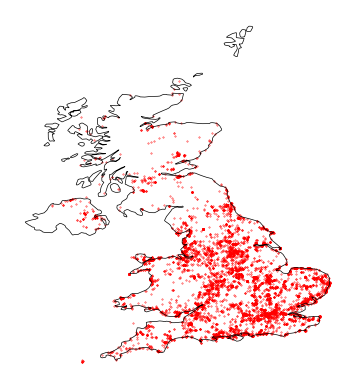

In [6]:
uk_map = world_map[world_map['iso_3166_1_alpha_2_codes'] == 'GB']
uk_map.geometry.boundary.plot(color="black", linewidth=0.5)
birds_uk.sample(10000).plot(ax=plt.gca(), color='red', markersize=0.1)
plt.axis('off')

(-8.66772549999995, 2.2454955000000494, 49.410877500000076, 61.387732500000034)

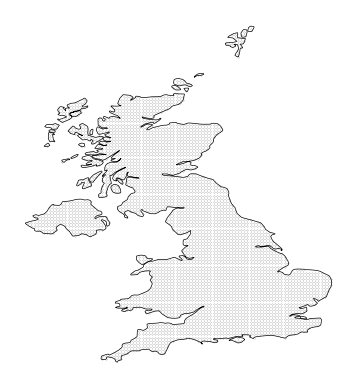

In [26]:
uk_map = world_map[world_map['iso_3166_1_alpha_2_codes'] == 'GB']
uk_map.geometry.boundary.plot(color="black", linewidth=0.5)

grid_gpd = gpd.GeoDataFrame(grid, geometry=gpd.points_from_xy(
    grid['lon'], grid['lat']))
grid_gpd.plot(ax=plt.gca(), color='black', markersize=0.01)


plt.axis("off")

In [12]:
id_col = ["lat", "lon"]
cov_col = ['avg_temp', 'avg_min_month', 'avg_max_month', 'pop_density']
target_col = grid.columns.difference(id_col).difference(cov_col)

grid["total_birds"] = grid[target_col].sum(axis=1)
target_col = grid.columns.difference(id_col).difference(cov_col)
grid["total_birds"].describe()

count     3349.000000
mean       610.688564
std       2177.515879
min          0.000000
25%          3.000000
50%         57.000000
75%        366.000000
max      64290.000000
Name: total_birds, dtype: float64

In [20]:
stats.linregress(grid.pop_density, grid.total_birds)

LinregressResult(slope=-1.3895577194116033, intercept=697.8805219708096, rvalue=-0.09877094324159652, pvalue=1.01738705984048e-08, stderr=0.24198626121861433, intercept_stderr=40.41018859018003)